In [1]:
# Import libraries
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
data = pd.read_csv('C:/Users/mncedisi.mncwabe/Downloads/Book1.csv')

In [14]:
data.head()

,Revenue,Popularity
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7


C:\Users\mncedisi.mncwabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


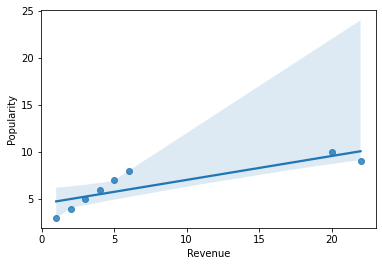

In [15]:
sns.regplot(data.Revenue, data.Popularity);

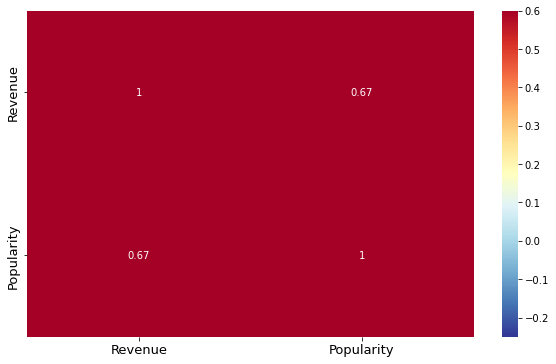

In [6]:
# another way to see the relationship between two variables 
# is to plot a heatmap correlation
# In this case there's a very stron correlation (seen with correlation above .60 with strong red)

plt.figure(figsize = (10,6))
plot = sns.heatmap(data.corr(method="pearson"), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plot.set_xticklabels(plot.get_xmajorticklabels(),fontsize = 13)
plot.set_yticklabels(plot.get_ymajorticklabels(),fontsize = 13)
plt.show()

In [26]:
# Find the outliers first using IQR (Inter-Quartile Range Method)
Q1 = data['Revenue'].quantile(0.25)
Q3 = data['Revenue'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
# Now check what is the lower and upper bound for Revenue (the 25th and 75th percentile values)

# In this case lower bound is -7.3 (meaning anything below -7.3 is an outlier )
# Upper bount is 19.6 (meaning anything above 19.6 is an outlier)


print(Q1 - 1.5 * IQR)         # values above below this value are outliers
print(Q3 + 1.5 * IQR)         # values above this value are also outliers

-7.375
19.625


In [22]:
# Drop the outliers
# meaning you are now dropping anything below -7. and above 19.6 on Revenue

df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
df.head(10)

,Revenue,Popularity
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8


C:\Users\mncedisi.mncwabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


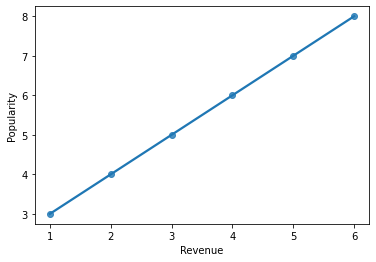

In [29]:
# Plot again to confirm that othe outliers have been dropped
# the outliers values was 20 and 22 on Revenue. They have been removed now
sns.regplot(df.Revenue, df.Popularity);